# LEBRON VS JORDAN PREDICTION



## ANALISIS DE LOS DATOS


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc, recall_score, precision_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
    
# import some data to play with
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

jordan_dataset = load_dataset('data/jordan_career.csv')
lebron_dataset = load_dataset('data/lebron_career.csv')


# Take the first two features. We could avoid this by using a two-dim dataset
#data = dataset.values


In [75]:
#REMOVE COLUMN MINUS PLUS AND REPLACE ALL NAN FOR FLOAT OF 0.0
jordan_dataset = jordan_dataset.drop(['minus_plus'], axis=1)
jordan_dataset = jordan_dataset.drop(['date'], axis=1)
jordan_dataset['threep'].fillna(0.0, inplace=True)
jordan_dataset['ftp'].fillna(0.0, inplace=True)


In [76]:
jordan_dataset['result'] = jordan_dataset['result'].str[:1]
jordan_dataset["mp"] = jordan_dataset["mp"].apply(lambda x: float(str(x).replace(":",".").split(",")[0].strip()))
jordan_dataset["age"] = jordan_dataset["age"].apply(lambda x: float(str(x).replace("-",".").split(",")[0].strip()))

In [77]:
jordan_dataset.head()

,game,age,team,opp,result,mp,fg,fga,fgp,three,...,ftp,orb,drb,trb,ast,stl,blk,tov,pts,game_score
0,1,21.252,CHI,WSB,W,40.0,5,16,0.313,0,...,0.857,1,5,6,7,2,4,5,16,12.5
1,2,21.253,CHI,MIL,L,34.0,8,13,0.615,0,...,1.000,3,2,5,5,2,1,3,21,19.4
2,3,21.255,CHI,MIL,W,34.0,13,24,0.542,0,...,0.846,2,2,4,5,6,2,3,37,32.9
3,4,21.256,CHI,KCK,W,36.0,8,21,0.381,0,...,1.000,2,2,4,5,3,1,6,25,14.7
4,5,21.258,CHI,DEN,L,33.0,7,15,0.467,0,...,0.750,3,2,5,5,1,1,2,17,13.2


<AxesSubplot: xlabel='result', ylabel='count'>

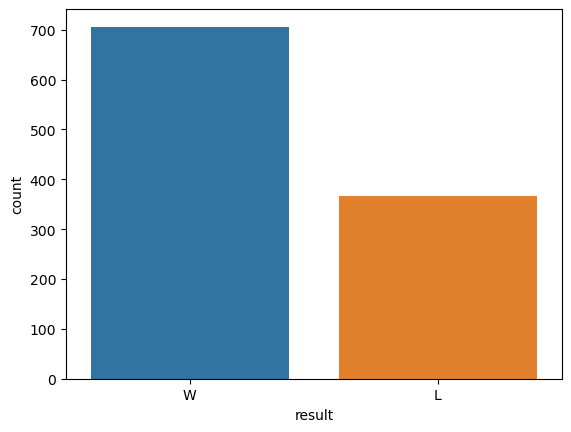

In [78]:
sns.countplot(x=jordan_dataset["result"])

In [79]:
def oversample(df):
    classes = df.result.value_counts().to_dict()
    most = max(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['result'] == key]) 
    classes_sample = []
    for i in range(1,len(classes_list)):
        classes_sample.append(classes_list[i].sample(most, replace=True))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

In [80]:
jordan = oversample(jordan_dataset)

<AxesSubplot: xlabel='result', ylabel='count'>

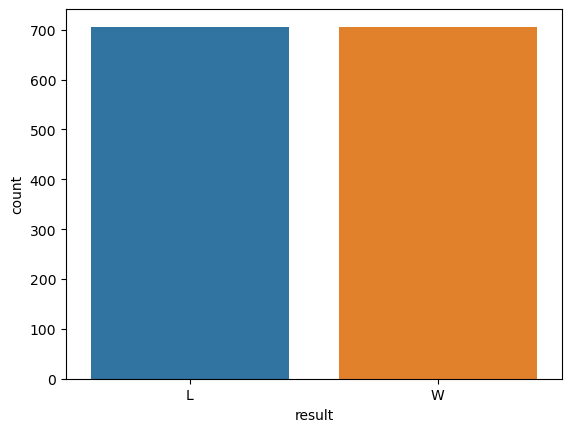

In [81]:
sns.countplot(x=jordan["result"])

### categorizar valores


In [82]:
print("####### JORDAN TEAMS ############")
print(jordan_dataset['team'].unique())
print("####### LEBRON TEAMS ############")
print(lebron_dataset['team'].unique())

####### JORDAN TEAMS ############
['CHI' 'WAS']
####### LEBRON TEAMS ############
['CLE' 'MIA']


In [83]:
mappingResult = {'W': 1, 'L': 0}
jordan_dataset = jordan_dataset.replace({'result': mappingResult})

mappingResult = {'W': 1, 'L': 0}
jordan = jordan.replace({'result': mappingResult})

mappingResult = {'CHI': 1, 'WAS': 0}
jordan_dataset = jordan_dataset.replace({'team': mappingResult})

mappingResult = {'CHI': 1, 'WAS': 0}
jordan = jordan.replace({'team': mappingResult})

In [84]:
#jordan_dataset = jordan_dataset.drop(['team'], axis=1)
jordan_dataset = jordan_dataset.drop(['opp'], axis=1)
jordan = jordan.drop(['opp'], axis=1)

In [85]:
jordan_dataset.head()

,game,age,team,result,mp,fg,fga,fgp,three,threeatt,...,ftp,orb,drb,trb,ast,stl,blk,tov,pts,game_score
0,1,21.252,1,1,40.0,5,16,0.313,0,0,...,0.857,1,5,6,7,2,4,5,16,12.5
1,2,21.253,1,0,34.0,8,13,0.615,0,0,...,1.000,3,2,5,5,2,1,3,21,19.4
2,3,21.255,1,1,34.0,13,24,0.542,0,0,...,0.846,2,2,4,5,6,2,3,37,32.9
3,4,21.256,1,1,36.0,8,21,0.381,0,0,...,1.000,2,2,4,5,3,1,6,25,14.7
4,5,21.258,1,0,33.0,7,15,0.467,0,0,...,0.750,3,2,5,5,1,1,2,17,13.2


In [86]:
jordan.head()

,game,age,team,result,mp,fg,fga,fgp,three,threeatt,...,ftp,orb,drb,trb,ast,stl,blk,tov,pts,game_score
0,13,33.280,1,0,39.0,17,32,0.531,0,6,...,0.833,1,5,6,4,2,1,2,44,32.1
1,61,33.022,1,0,43.0,12,26,0.462,2,4,...,0.857,1,7,8,3,1,1,7,32,16.6
2,16,23.291,1,0,41.0,15,37,0.405,0,0,...,0.765,2,2,4,2,3,1,1,43,27.2
3,3,32.035,1,0,44.0,7,23,0.304,0,2,...,0.636,0,4,4,8,5,2,2,21,16.5
4,62,26.029,1,0,44.0,11,24,0.458,0,1,...,0.857,0,6,6,10,0,1,2,28,22.3


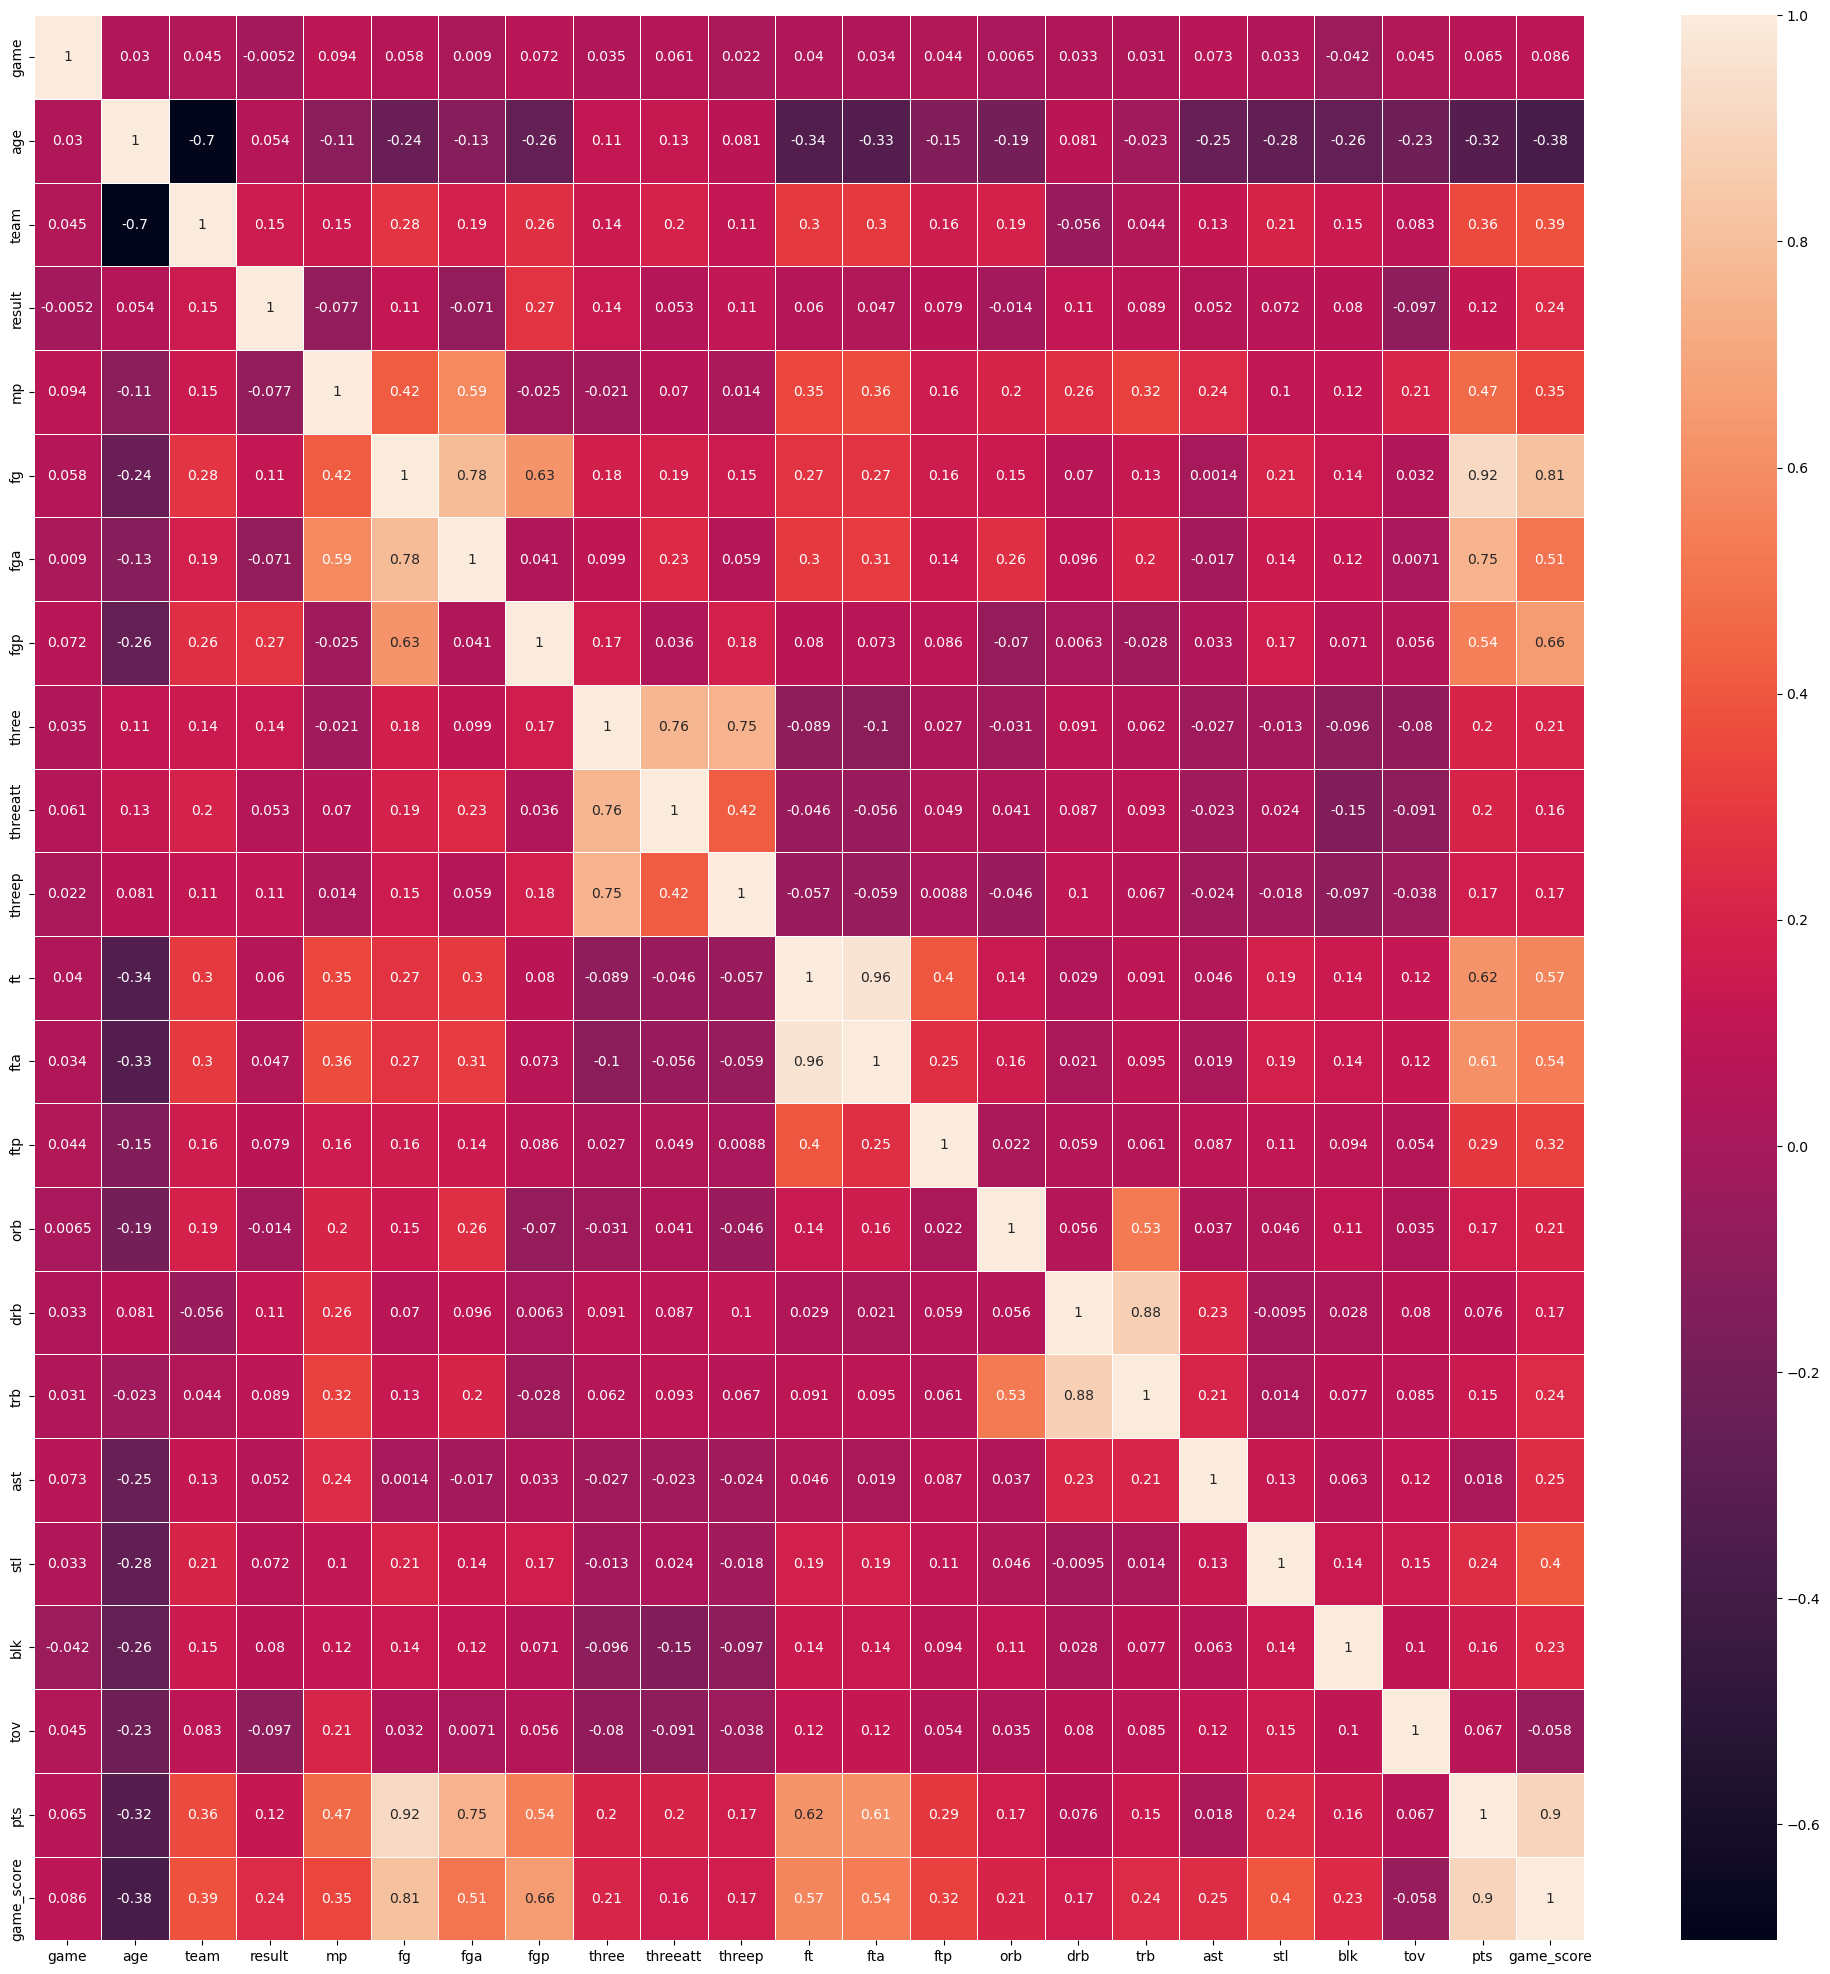

In [88]:
correlacio = jordan_dataset.corr()
plt.figure(figsize=(25,25))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

In [57]:
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
    
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = KNeighborsClassifier(n_neighbors=6)
    clf_base.fit(X_train, y_train)
    return clf_base


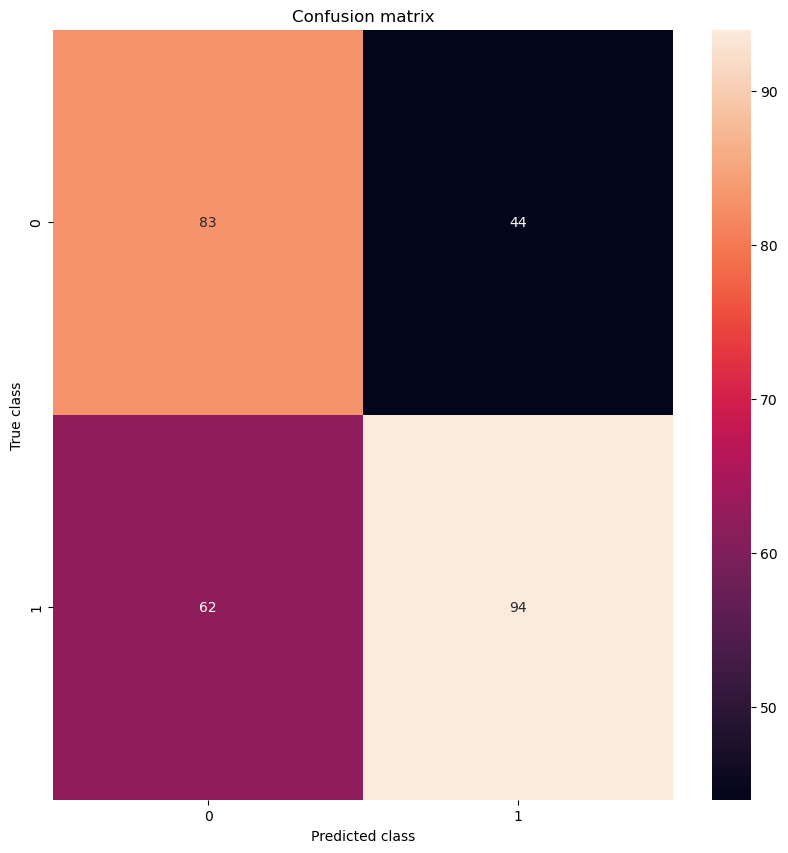

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       127
           1       0.68      0.60      0.64       156

    accuracy                           0.63       283
   macro avg       0.63      0.63      0.62       283
weighted avg       0.63      0.63      0.63       283



In [89]:
features = ["fgp","game_score"]
X = jordan.loc[:, features] 
y = jordan.loc[:, 'result'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

 
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

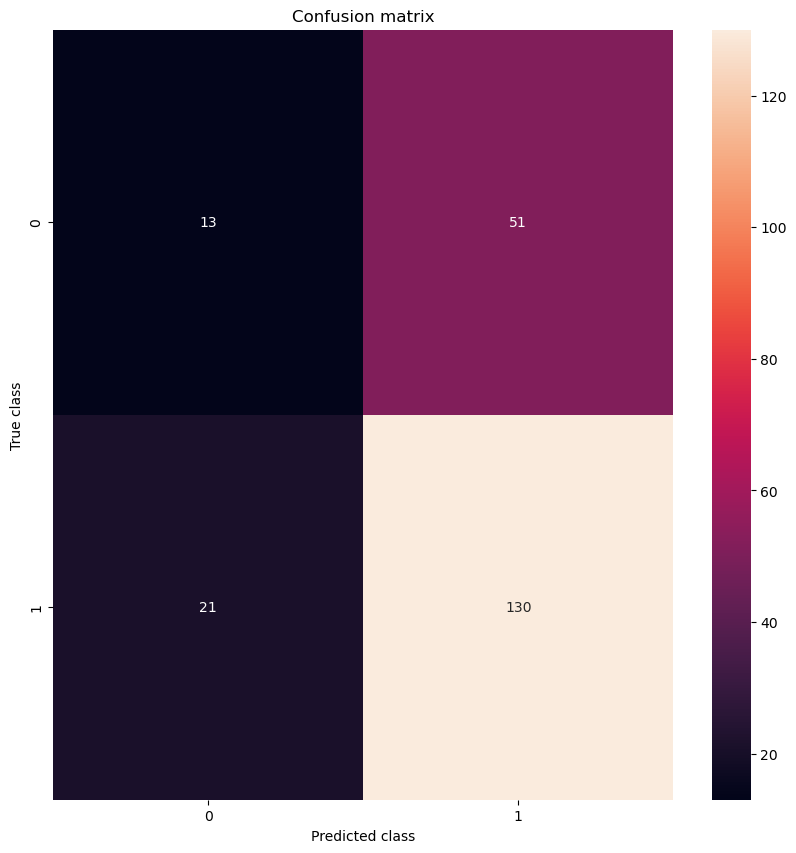

              precision    recall  f1-score   support

           0       0.38      0.20      0.27        64
           1       0.72      0.86      0.78       151

    accuracy                           0.67       215
   macro avg       0.55      0.53      0.52       215
weighted avg       0.62      0.67      0.63       215



In [90]:
features = ["fgp","game_score"]
X = jordan_dataset.loc[:, features] 
y = jordan_dataset.loc[:, 'result'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)